In [1]:
import sys

sys.path.append("../../")
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame, concat
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 성능 측정 지표 모듈
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# 그래프 한글 설정
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [6]:
origin = read_excel("https://data.hossam.kr/E04/beans.xlsx")
origin = concat([origin, origin^2, origin^3, origin^4])
origin.reset_index(drop=True, inplace=True)
origin.shape

(40, 2)

회귀분석 수행

In [7]:
ols = helper.ml_ols(origin, xnames="수분함유량", yname="강도", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

계수:  [-2.70994363  0.04655621]
절편:  65.89184790164555
훈련데이터의 설명력:  0.8051396273996146
R^2:  0.8051396273996146
MAE:  1.58472181683643
MSE:  3.964812071073147
RMSE:  1.9911835854770266
MAPE:  5.345915255251178
MPE:  -0.4195318581549131
+----+------------+--------------+-----------+------------+-----+----------+------------+---------+
|    | 종속변수   | 독립변수     |         B |   표준오차 |   β |        t |   유의확률 |     VIF |
|----+------------+--------------+-----------+------------+-----+----------+------------+---------|
|  0 | 강도       | 수분함유량   |  -2.70994 |   0.870251 |   0 | -3.11398 | 0.00355387 | 207.413 |
|  1 | 강도       | 수분함유량^2 | 0.0465562 |  0.0120618 |   0 |  3.85981 | 0.00043951 | 57.5318 |
+----+------------+--------------+-----------+------------+-----+----------+------------+---------+


시각화

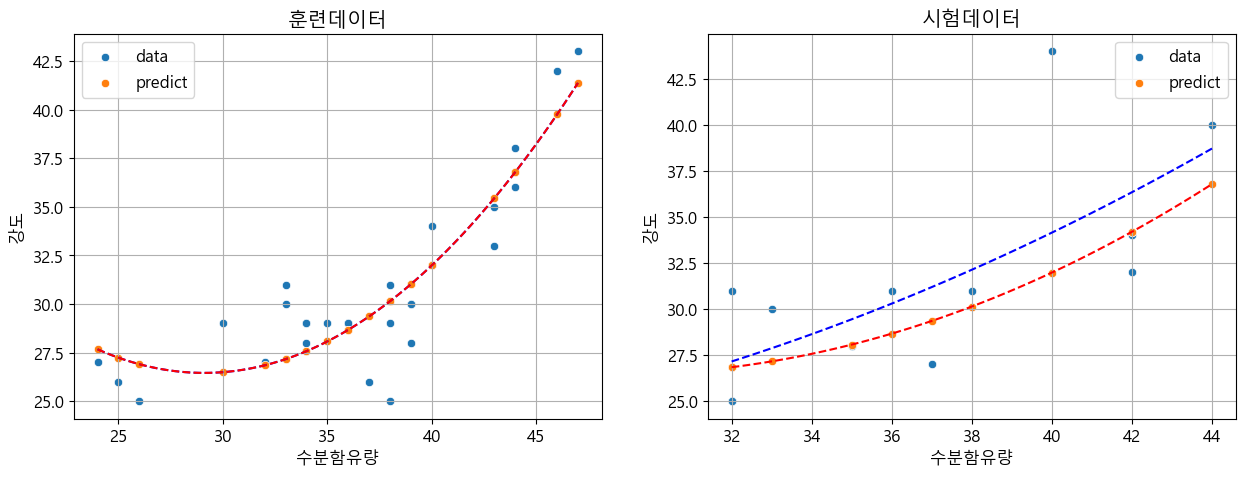

In [8]:
helper.regplot(ols.x_train['수분함유량'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['수분함유량'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

에어컨 예약대수에 따른 실 판매대수 분석

In [9]:
origin = read_excel("https://data.hossam.kr/E04/aircon.xlsx")
#origin = concat([origin, origin, origin, origin, origin])
#origin.reset_index(drop=True, inplace=True)
origin.head()

,예약대수,판매대수
0,19,33
1,23,51
2,26,40
3,29,49
4,30,50


분석

계수:  [-0.55406606  0.02353277]
절편:  49.223681453537495
훈련데이터의 설명력:  0.8790272953308501
R^2:  0.8790272953308501
MAE:  4.931426347359585
MSE:  31.206020143225597
RMSE:  5.58623488077843
MAPE:  7.956937195376915
MPE:  -0.7604452522229356
+----+------------+------------+-----------+------------+-----+-----------+------------+---------+
|    | 종속변수   | 독립변수   |         B |   표준오차 |   β |         t |   유의확률 |     VIF |
|----+------------+------------+-----------+------------+-----+-----------+------------+---------|
|  0 | 판매대수   | 예약대수   | -0.554066 |    1.74783 |   0 | -0.317003 |   0.760487 | 146.194 |
|  1 | 판매대수   | 예약대수^2 | 0.0235328 |  0.0227504 |   0 |   1.03439 |    0.33536 | 19.0598 |
+----+------------+------------+-----------+------------+-----+-----------+------------+---------+


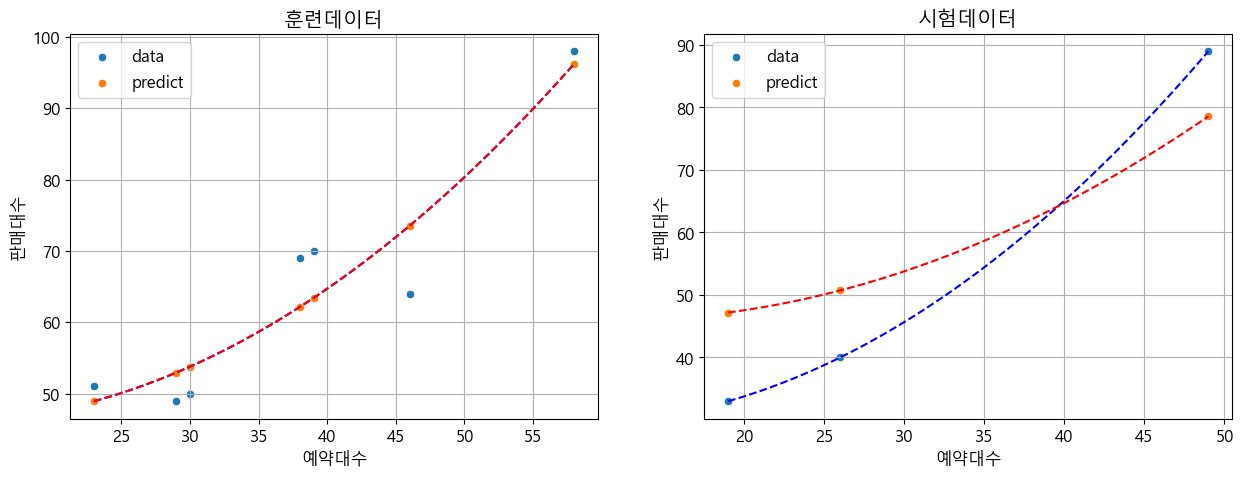

In [10]:
ols = helper.ml_ols(origin, xnames="예약대수", yname="판매대수", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

helper.regplot(ols.x_train['예약대수'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['예약대수'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

예측

In [11]:
#result = ols.fit.predict([[150]])
result = ols.fit.predict([[150, 150**2]])
result

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([495.60104227])

부모의 키에 따른 자식의 키 예측

In [13]:
origin = read_excel("https://data.hossam.kr/E04/galton.xlsx")
origin

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0
...,...,...
923,73.7,69.5
924,73.7,69.5
925,73.7,69.5
926,73.7,69.5


분석

계수:  [-6.03493121  0.04880873]
절편:  252.40084334590293
훈련데이터의 설명력:  0.21339707956726817
R^2:  0.21339707956726817
MAE:  1.776372825429812
MSE:  4.960943625539211
RMSE:  2.2273175852444598
MAPE:  2.621174571683983
MPE:  -0.1080389649267255
+----+------------+------------+-----------+------------+-----+----------+------------+---------+
|    | 종속변수   | 독립변수   |         B |   표준오차 |   β |        t |   유의확률 |     VIF |
|----+------------+------------+-----------+------------+-----+----------+------------+---------|
|  0 | child      | parent     |  -6.03493 |    2.19015 |   0 | -2.75549 | 0.00597567 | 3169.65 |
|  1 | child      | parent^2   | 0.0488087 |  0.0160359 |   0 |  3.04371 | 0.00240289 | 1580.59 |
+----+------------+------------+-----------+------------+-----+----------+------------+---------+


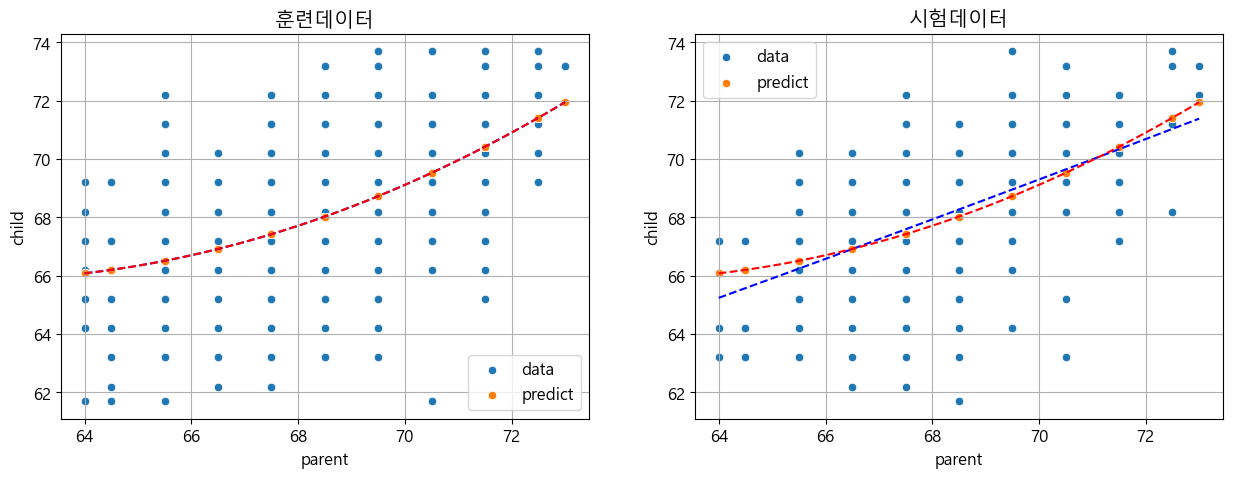

In [14]:
ols = helper.ml_ols(origin, xnames="parent", yname="child", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

helper.regplot(ols.x_train['parent'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['parent'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

예측

In [15]:
result = ols.fit.predict([[68.9, 68.9**2]])
result

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([68.2993884])

문제 2

In [16]:
origin = read_excel("https://data.hossam.kr/E04/diabetes.xlsx")
origin.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135


In [17]:
origin['sex'].value_counts()

sex
-0.044642    235
 0.050680    207
Name: count, dtype: int64

In [18]:
origin['sex'] = np.where(origin['sex'] < 0, 0, 1)
origin['sex'].value_counts()

sex
0    235
1    207
Name: count, dtype: int64

계수:  [ -14.7440463   589.39814506  284.04579693 -223.59685911  682.54074341]
절편:  154.9771434955162
훈련데이터의 설명력:  0.4935365620379498
검증데이터의 설명력:  0.48997951425439557
R^2:  0.4935365620379498
MAE:  43.8940428836076
MSE:  2912.1449194512898
RMSE:  53.964293004275426
MAPE:  39.69503541035235
MPE:  -18.230642021092834
+----+------------+------------+----------+------------+-----+----------+-------------+---------+
|    | 종속변수   | 독립변수   |        B |   표준오차 |   β |        t |    유의확률 |     VIF |
|----+------------+------------+----------+------------+-----+----------+-------------+---------|
|  0 | target     | sex        |  -14.744 |    5.42482 |   0 | -2.71789 |   0.0068319 | 1.73032 |
|  1 | target     | bmi        |  589.398 |    63.8091 |   0 |  9.23689 |           0 | 1.41498 |
|  2 | target     | bp         |  284.046 |    63.4803 |   0 |  4.47455 |  9.7838e-06 | 1.32576 |
|  3 | target     | s1         | -223.597 |    64.3903 |   0 | -3.47253 | 0.000567064 | 1.31928 |
|  4 | target  

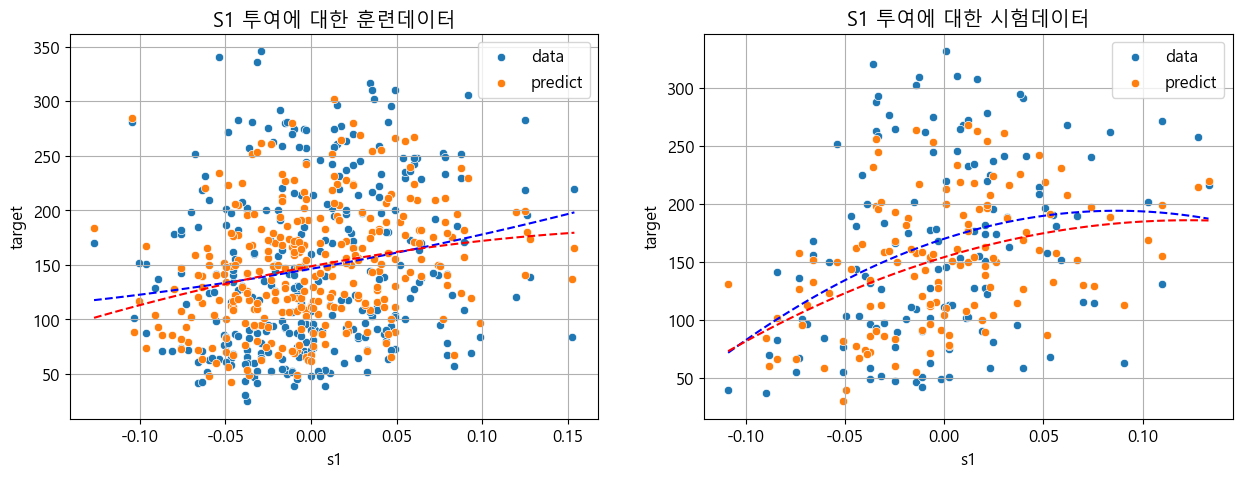

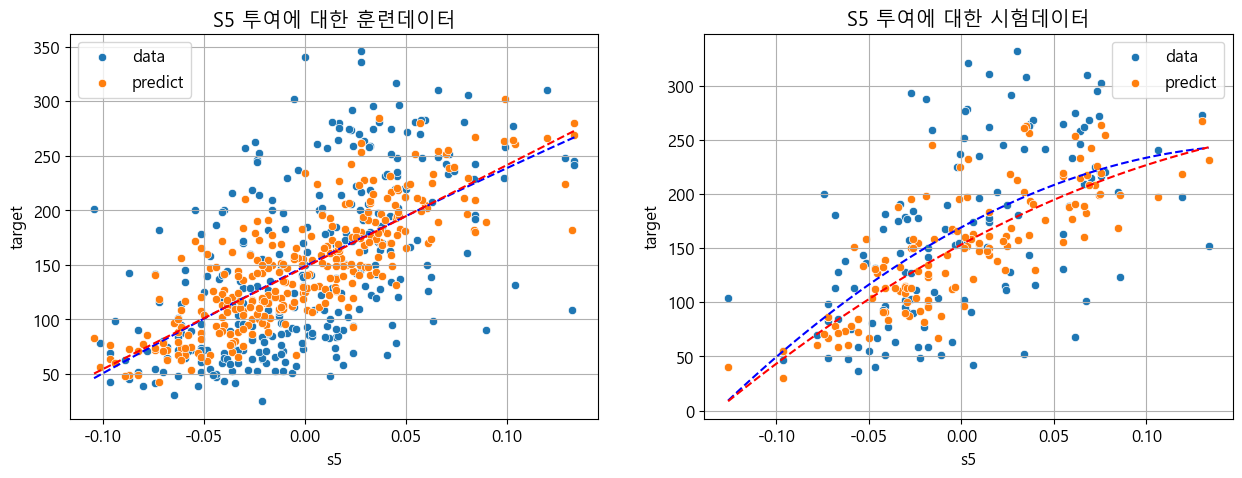

In [19]:
xnames = "sex,bmi,bp,s1,s5"
ols = helper.ml_ols(origin, xnames=xnames, yname="target", degree=1, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)
print("검증데이터의 설명력: ", ols.testRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

helper.regplot(ols.x_train['s1'], ols.y_train, ols.train_pred, "S1 투여에 대한 훈련데이터",
               ols.x_test['s1'], ols.y_test, ols.test_pred, "S1 투여에 대한 시험데이터",
               figsize=(15, 5))


helper.regplot(ols.x_train['s5'], ols.y_train, ols.train_pred, "S5 투여에 대한 훈련데이터",
               ols.x_test['s5'], ols.y_test, ols.test_pred, "S5 투여에 대한 시험데이터",
               figsize=(15, 5))

뉴욕 멘하튼 주택 임대료 예측 모델